# Krypton RPHi 2nd iteration Lifetime maps

##  Attempts to correct in second iteration (in RPHI) the lifetime produce by the first x-y correction

### Author:  JJGC

### Software: KrCalib : https://github.com/nextic/KrCalib/

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Fri Oct 12 13:59:07 2018


### Logger

In [2]:
import logging


logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

logging.info('Hello world!')


2018-10-12 13:59:09,212 | INFO : Hello world!


### Input files

In [3]:
from krcal.core.kr_types import KrFileName
input_path  = f"$IC_DATA/dst"
output_path = f"$IC_DATA/ldst"
map_path    = f"$IC_DATA/maps"

input_file_names  = ['dst_6350_6353_lt0.h5']


output_file_name  = ' '
map_file_name     = ''
map_file_name_ts  = 'kr_maps_rphi_ts_6350_6353.h5'
emap_file_name    = ''


krfn = KrFileName(input_file_names,
                  output_file_name,
                  map_file_name,
                  map_file_name_ts,
                  emap_file_name)

### Notebook configuration

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import tables            as tb
import random
import glob
import warnings
sns.set()

In [6]:
from  invisible_cities.io.dst_io              import load_dsts
from  invisible_cities.core .core_functions   import in_range
from  invisible_cities.core.system_of_units_c import units
import invisible_cities.reco.corrections      as corrf

In [7]:
from krcal.core.io_functions       import kdst_write
from krcal.core.io_functions       import filenames_from_list
from krcal.core.io_functions       import write_maps
from krcal.core.io_functions       import read_maps
from krcal.core.io_functions       import write_maps_ts
from krcal.core.io_functions       import read_maps_ts

In [8]:
from krcal.core.histo_functions    import h1, h1d, h2, h2d, plot_histo

In [9]:
from krcal.core.core_functions      import time_delta_from_time
from krcal.core.core_functions      import phirad_to_deg
from krcal.core.core_functions      import NN
from krcal.core                     import fit_functions_ic as fitf

In [10]:
from krcal.core.plt_functions  import plot_sector
from krcal.core.plt_functions  import plot_sectors

In [11]:
from krcal.core.stat_functions      import mean_and_std

In [12]:
from krcal.core.analysis_functions  import kr_ranges_and_bins
from krcal.core.analysis_functions  import fiducial_volumes
from krcal.core.analysis_functions  import fid_eff
from krcal.core.analysis_functions  import select_rphi_sectors
from krcal.core.analysis_functions  import select_xy_sectors
from krcal.core.analysis_functions  import event_map

from krcal.core.analysis_functions  import kr_event_selection
from krcal.core.analysis_functions  import kr_event

In [13]:
from krcal.core.s1s2_functions       import energy_time_profile
from krcal.core.s1s2_functions       import energy_X_profile

In [14]:
from krcal.core.fit_lt_functions    import fit_lifetime
from krcal.core.fit_lt_functions    import time_fcs
from krcal.core.fit_lt_functions    import fit_fcs_in_rphi_sectors
from krcal.core.fit_lt_functions    import fit_fcs_in_xy_bin
from krcal.core.fit_lt_functions    import fit_map_rphi
from krcal.core.fit_lt_functions    import fit_map_xy
from krcal.core.fit_lt_functions    import get_time_series

In [15]:
from krcal.core.fit_energy_functions    import fit_energy
from krcal.core.fit_energy_functions    import plot_fit_energy
from krcal.core.fit_energy_functions    import print_fit_energy
from krcal.core.fit_energy_functions    import resolution_r_z
from krcal.core.fit_energy_functions    import plot_resolution_r_z

In [16]:
from krcal.core.fit_lt_histograms   import histo_fit_sectors
from krcal.core.fit_lt_histograms   import print_fit_sectors_pars
from krcal.core.fit_lt_histograms   import plot_fit_sectors
from krcal.core.fit_lt_histograms   import plot_fit_xy
from krcal.core.fit_lt_histograms   import plot_time_fcs
from krcal.core.fit_lt_histograms   import plot_fit_lifetime_and_chi2
from krcal.core.fit_lt_histograms   import print_fit_lifetime

In [17]:
from krcal.core.kr_types import PlotLabels, KrEvent, ASectorMap
from krcal.core.kr_types import FitType, KrSector, MapType
from krcal.core.kr_types import KrFileName


In [19]:
from krcal.core.map_functions   import tsmap_from_fmap
from krcal.core.map_functions   import amap_from_tsmap
from krcal.core.map_functions   import relative_errors
from krcal.core.map_functions   import amap_valid_mask
from krcal.core.map_functions   import amap_valid_fraction
from krcal.core.map_functions   import amap_average
from krcal.core.map_functions   import amap_max
from krcal.core.map_functions   import amap_min
from krcal.core.map_functions   import amap_replace_nan_by_mean
from krcal.core.map_functions   import amap_replace_nan_by_zero
from krcal.core.map_functions   import regularize_maps
from krcal.core.map_functions   import get_maps_from_tsmap
from krcal.core.map_functions   import map_average

In [21]:
from krcal.core.xy_maps_functions   import draw_xy_maps
from krcal.core.xy_maps_functions   import draw_xy_map
from krcal.core.xy_maps_functions   import draw_xy_maps_ts

In [22]:
from krcal.core.rphi_maps_functions   import draw_rphi_maps
from krcal.core.rphi_maps_functions   import draw_rphi_map
from krcal.core.rphi_maps_functions   import draw_rphi_maps_ts
from krcal.core.rphi_maps_functions   import draw_wedges
from krcal.core.rphi_maps_functions   import define_rphi_sectors
from krcal.core.rphi_maps_functions   import rphi_sector_alpha_map
from krcal.core.rphi_maps_functions   import rphi_sector_map_def

In [23]:
from krcal.core.correction_functions import e0_rphi_correction
from krcal.core.correction_functions import e0_xy_correction
from krcal.core.correction_functions import lt_xy_correction
from krcal.core.correction_functions import e0_xy_correction_ts
from krcal.core.correction_functions import lt_xy_correction_ts
from krcal.core.correction_functions import lt_rphi_correction
from krcal.core.correction_functions import lt_rphi_correction_ts
from krcal.core.correction_functions import e0_rphi_correction_ts

In [24]:
import krcal.dev.corrections       as corrections 


In [25]:
from numpy import pi, sqrt

In [26]:
from typing      import List, Tuple, Dict, Sequence, Iterable

In [27]:
from ipywidgets import interact, interactive, fixed
from IPython.display import display

### Logger

In [28]:
log = logging.getLogger()

### Input/output 

In [29]:
fn =filenames_from_list(krfn, input_path, output_path, map_path)

In [30]:
fn

KrFileName(input_file_names=['/Users/jjgomezcadenas/Projects/ICDATA/dst/dst_6350_6353_lt0.h5'], output_file_name='/Users/jjgomezcadenas/Projects/ICDATA/ldst/ ', map_file_name='/Users/jjgomezcadenas/Projects/ICDATA/maps/', map_file_name_ts='/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_maps_rphi_ts_6350_6353.h5', emap_file_name='/Users/jjgomezcadenas/Projects/ICDATA/maps/')

In [31]:
dst           = load_dsts(fn.input_file_names, "DST", "Events")

In [32]:
print(f"Total number of events: {len(dst)}")

Total number of events: 3929020


In [33]:
dst.columns

Index(['index', 'event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w',
       'S1h', 'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT',
       'Z', 'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms'],
      dtype='object')

### Time differences in seconds

In [34]:
dst_time = dst.sort_values('event')
T       = dst_time.time.values
DT      = time_delta_from_time(T)

### Ranges and binning

In [35]:
RMAX      = 200
RCORE     = 100
s1e_range = (3, 25)
s2e_range = (2000, 14000)
s2q_range = (200, 800)

xy_range  = (-RMAX,  RMAX)
z_range   = (10,  550)
e_range = (5000, 14000)
lt_range = (1000, 6000)
c2_range = (0,5)

krTimes, krRanges, krNbins, krBins = kr_ranges_and_bins(dst,
                                                        xxrange   = xy_range,
                                                        yrange    = xy_range,
                                                        zrange    = z_range,
                                                        s2erange  = s2e_range,
                                                        s1erange  = s1e_range,
                                                        s2qrange  = s2q_range,
                                                        xnbins    = 100,
                                                        ynbins    = 100,
                                                        znbins    = 15,
                                                        s2enbins  = 25,
                                                        s1enbins  = 10,
                                                        s2qnbins  = 25,
                                                        tpsamples = 3600) # tsamples in seconds

In [36]:
kge = kr_event(dst, DT, dst.S2e, dst.S2q)

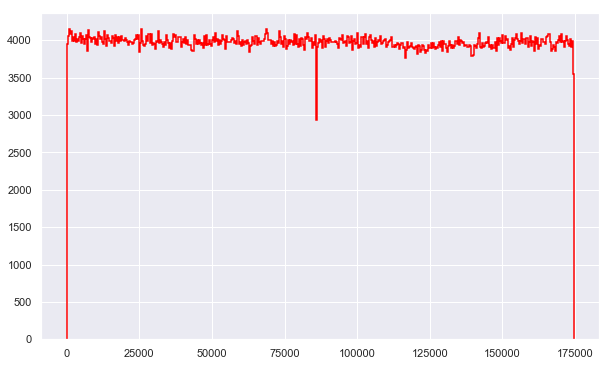

In [37]:
fig = plt.figure(figsize=(10,6))
ax      = fig.add_subplot(1, 1, 1)
(_)    = h1(kge.DT, bins=500, range = (kge.DT[0], kge.DT[-1]), color='red', stats=False, lbl='pre-sel')

### Time 

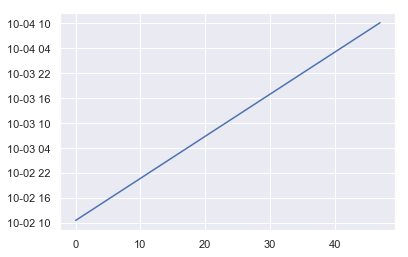

In [38]:
plt.plot(krTimes.timeStamps)

### Event distribution

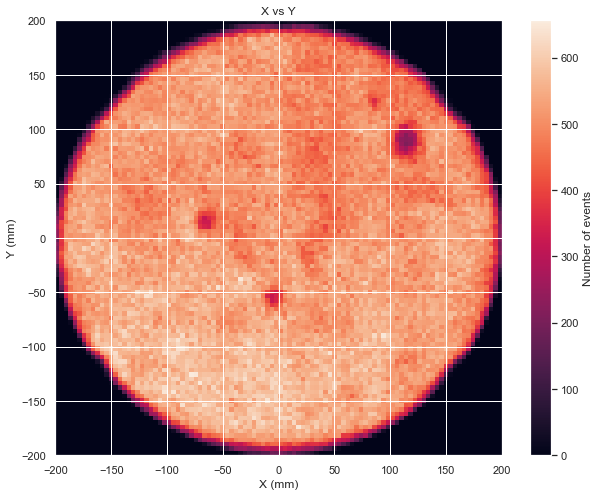

In [39]:
nevt = h2d(dst.X, dst.Y, krNbins.X, krNbins.Y, krRanges.X, krRanges.Y, 
           pltLabels=PlotLabels(x='X (mm)', y='Y (mm)', title='X vs Y'),
           profile=False,
           figsize=(10,8))

## Time series

In [40]:
log.setLevel(logging.INFO)

### Divide dst in 100 time series

In [41]:
nt = 100
t0 = time.time()

ts, masks = get_time_series(nt, DT[-1], kge)  
t1 = time.time()
print(f' get_time_series: t = {t1 -t0}')

 get_time_series: t = 0.7203578948974609


### Fit lifetime full detector

In [42]:
t0 = time.time()
fps = time_fcs(ts, masks, kge, 
               nbins_z = 15,
               nbins_e = 25,
               range_z = (10, 550),
               range_e = (7000, 14000),
               energy  = 'S2e',
               fit     = FitType.unbined)
t1 = time.time()
print(f' time_fcs: t = {t1 -t0}')

 time_fcs: t = 2.2211461067199707


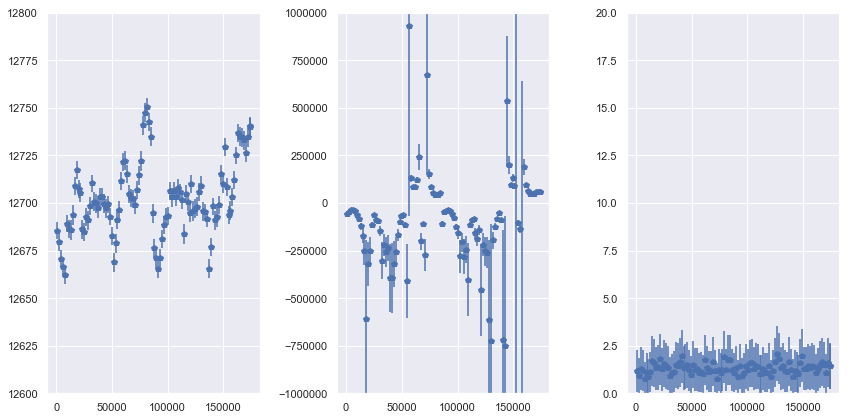

In [43]:
plot_time_fcs(fps,
              range_chi2  = (0,20),
              range_e0    = (12600,12800),
              range_lt    = (-1000000, 1000000),
              figsize     = (12,6))

#### The fit suggests that not much can done, lifetime is corrected and the variations in e0 are at the level of 100 pes, which is much less than the resolution we expect (300 pes) 

## Lifetime in RPhi

In [44]:
NSECTORS =5  # number of sectors in R. Each sector then is 200 / 5 = 40 cm.
SPHI     =60 # size of the phi pie-slice in degrees

In [45]:
rpsmd = rphi_sector_map_def(nSectors=NSECTORS, rmax=RMAX, sphi=SPHI)

In [46]:
W = define_rphi_sectors(rpsmd)

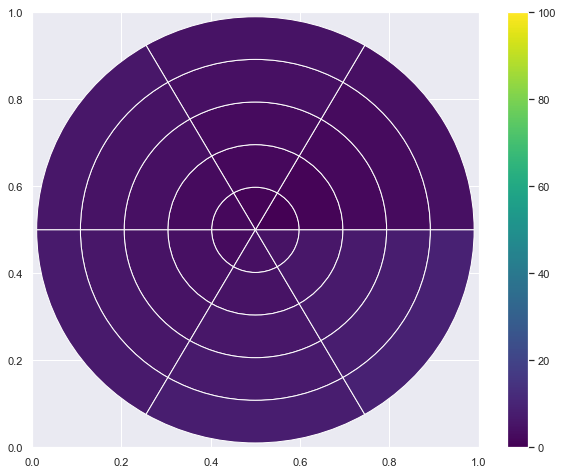

In [47]:
draw_wedges(W,  rmax = RMAX, 
            scale= 0.49, figsize=(10,8), alpha=1.0,
            cr =range(NSECTORS))

In [48]:
t0 = time.time()
KRES = select_rphi_sectors(dst, DT, dst.S2e, dst.S2q, W)
t1 = time.time()
print(f' KRES: t = {t1 -t0}')

 KRES: t = 4.161164045333862


In [49]:
neM = event_map(KRES)

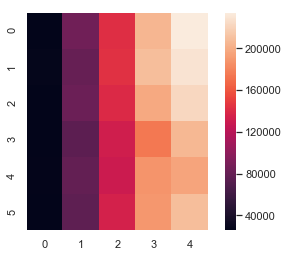

In [50]:
ax = sns.heatmap(neM, square=True)

### 6 phi sectors

### R < 40 mm

In [51]:
erange = (12500,13000)
ltrange = (-1e+6, 1e+6)
time_bins = 100

In [52]:
fps = fit_fcs_in_rphi_sectors(sector = 0,
                              selection_map = KRES,
                              event_map     = neM,
                              n_time_bins   = time_bins,
                              time_diffs    =DT,
                              nbins_z       = 25,
                              nbins_e       = 50,
                              range_z       =(50, 550),
                              range_e       = (5000, 13500),
                              energy        = 'S2e',
                              fit           = FitType.unbined,
                              n_min         = 100)

/Users/jjgomezcadenas/Projects/KrCalib/krcal/core/fit_lt_histograms.py:253: RuntimeWarning: invalid value encountered in sqrt
  plt.errorbar(fp.ts, fp.lt, np.sqrt(fp.lt), fmt="p")


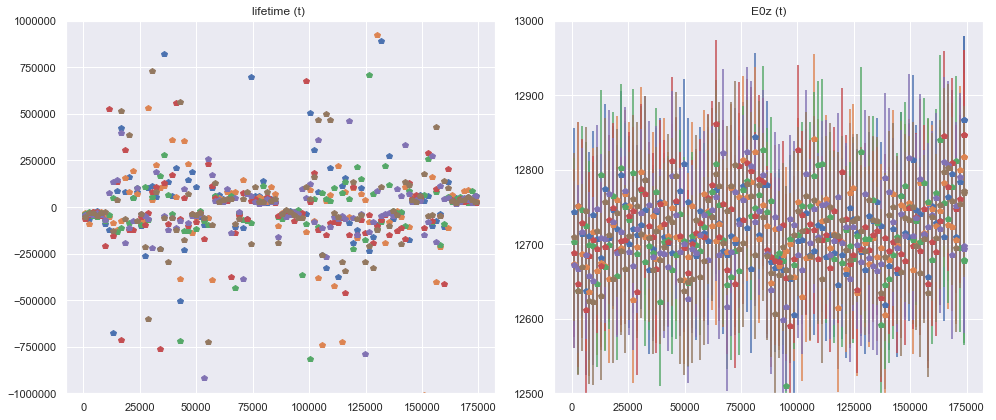

In [53]:
plot_fit_sectors(fps,  range_e0 =erange, range_lt=ltrange)

### 40 < R < 80

In [54]:
fps = fit_fcs_in_rphi_sectors(sector = 1,
                              selection_map = KRES,
                              event_map     = neM,
                              n_time_bins   = time_bins,
                              time_diffs    =DT,
                              nbins_z       = 25,
                              nbins_e       = 50,
                              range_z       =(50, 550),
                              range_e       = (5000, 13500),
                              energy        = 'S2e',
                              fit           = FitType.unbined,
                              n_min         = 100)

/Users/jjgomezcadenas/Projects/KrCalib/krcal/core/fit_lt_histograms.py:253: RuntimeWarning: invalid value encountered in sqrt
  plt.errorbar(fp.ts, fp.lt, np.sqrt(fp.lt), fmt="p")


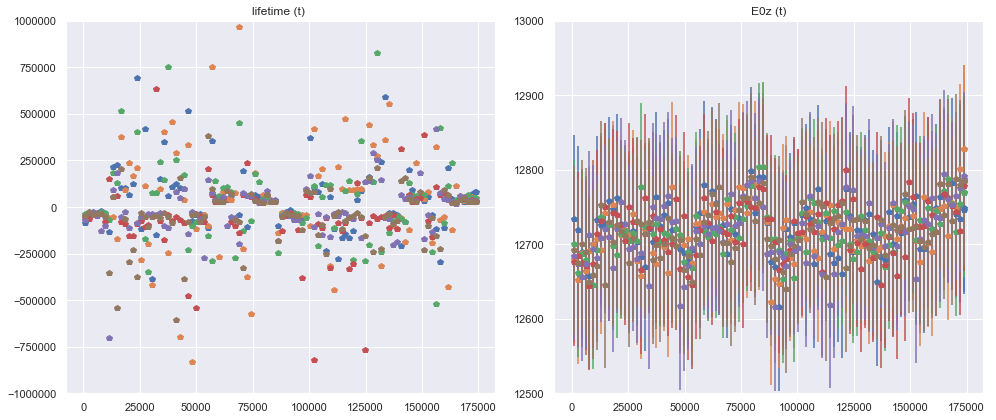

In [55]:
plot_fit_sectors(fps,  range_e0 =erange, range_lt=ltrange)

### 80 < R < 120

In [56]:
fps = fit_fcs_in_rphi_sectors(sector = 2,
                              selection_map = KRES,
                              event_map     = neM,
                              n_time_bins   =time_bins,
                              time_diffs    =DT,
                              nbins_z       = 25,
                              nbins_e       = 50,
                              range_z       =(50, 550),
                              range_e       = (5000, 13500),
                              energy        = 'S2e',
                              fit           = FitType.unbined,
                              n_min         = 100)

/Users/jjgomezcadenas/Projects/KrCalib/krcal/core/fit_lt_histograms.py:253: RuntimeWarning: invalid value encountered in sqrt
  plt.errorbar(fp.ts, fp.lt, np.sqrt(fp.lt), fmt="p")


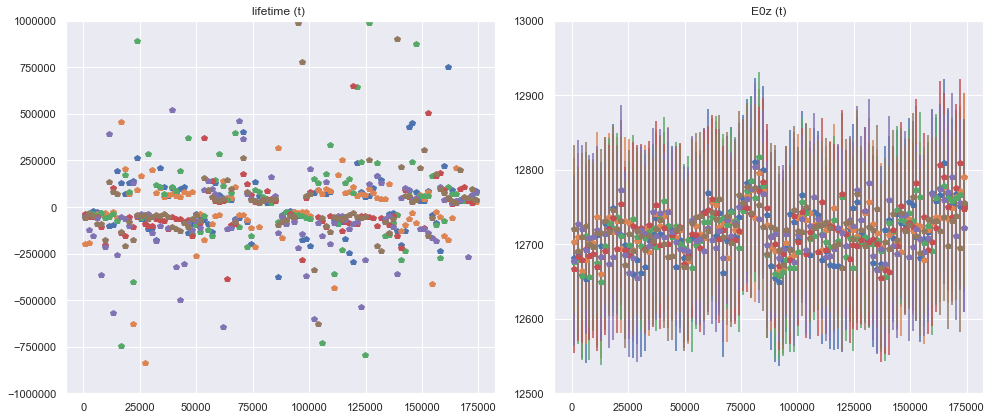

In [57]:
plot_fit_sectors(fps,  range_e0 =erange, range_lt=ltrange)

### 120 < R < 160

In [58]:
fps = fit_fcs_in_rphi_sectors(sector = 3,
                              selection_map = KRES,
                              event_map     = neM,
                              n_time_bins   =time_bins,
                              time_diffs    =DT,
                              nbins_z       = 25,
                              nbins_e       = 50,
                              range_z       =(50, 550),
                              range_e       = (5000, 13500),
                              energy        = 'S2e',
                              fit           = FitType.unbined,
                              n_min         = 100)

/Users/jjgomezcadenas/Projects/KrCalib/krcal/core/fit_lt_histograms.py:253: RuntimeWarning: invalid value encountered in sqrt
  plt.errorbar(fp.ts, fp.lt, np.sqrt(fp.lt), fmt="p")


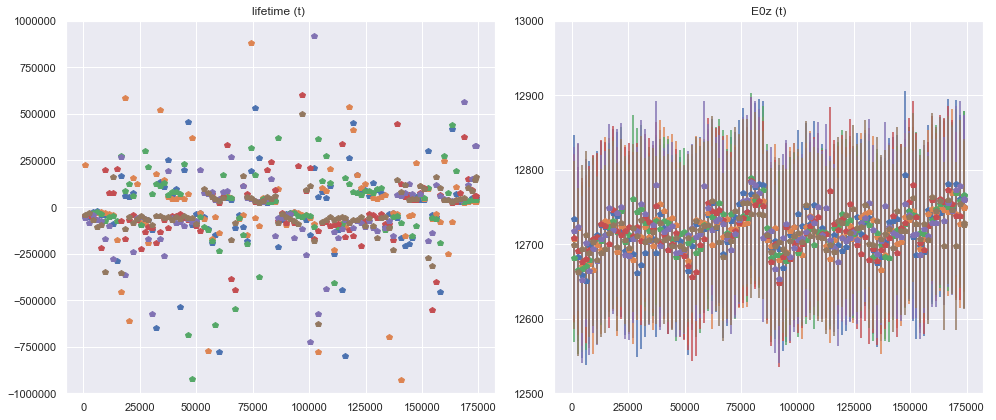

In [59]:
plot_fit_sectors(fps,  range_e0 =erange, range_lt=ltrange)

### 160 < R < 200

In [60]:
fps = fit_fcs_in_rphi_sectors(sector = 4,
                              selection_map = KRES,
                              event_map     = neM,
                              n_time_bins   =time_bins,
                              time_diffs    =DT,
                              nbins_z       = 25,
                              nbins_e       = 50,
                              range_z       =(50, 550),
                              range_e       = (5000, 13500),
                              energy        = 'S2e',
                              fit           = FitType.unbined,
                              n_min         = 100)

/Users/jjgomezcadenas/Projects/KrCalib/krcal/core/fit_lt_histograms.py:253: RuntimeWarning: invalid value encountered in sqrt
  plt.errorbar(fp.ts, fp.lt, np.sqrt(fp.lt), fmt="p")


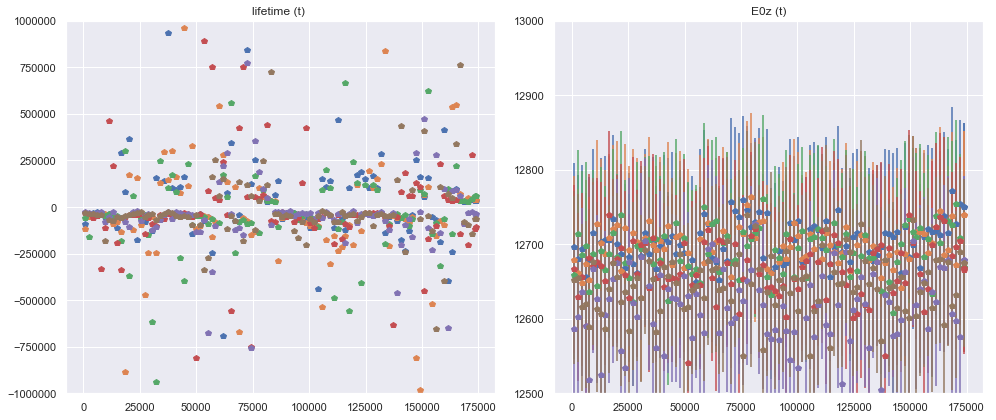

In [61]:
plot_fit_sectors(fps,  range_e0 =erange, range_lt=ltrange)

In [62]:
log.setLevel(logging.DEBUG)

2018-10-12 14:03:58,438 | DEBUG : number of events in sector = 159284.0
2018-10-12 14:03:58,696 | DEBUG : number of events in sector = 481486.0
2018-10-12 14:03:59,071 | DEBUG : number of events in sector = 825033.0
2018-10-12 14:03:59,749 | DEBUG : number of events in sector = 1165702.0
2018-10-12 14:04:00,456 | DEBUG : number of events in sector = 1297515.0


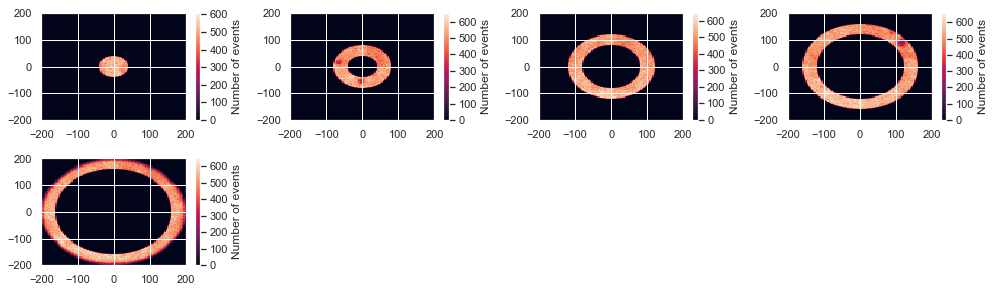

In [63]:
plot_sectors(KRES, krNbins.X, krNbins.Y, krRanges.X,krRanges.Y, nx = 5, ny =4,figsize=(14,10))

In [64]:
log.setLevel(logging.INFO)

### RPHI maps

#### Maps:

- **fit_map_rphi()** creates a **fmap** with values of the fit parameters in bins (or rphi or xy)
- **tsmap_from_fmap(fmap)** creates a tsmap, with values of E0, lt, etc. in time bins.
- **amap_from_tsmap()** creates an amap, for a given time bin ts

In [65]:
t0 = time.time()
fmap = fit_map_rphi(selection_map = KRES,
                       event_map     = neM,
                       n_time_bins   = time_bins,
                       time_diffs    = DT,
                       nbins_z        = krNbins.Z, 
                       nbins_e        = krNbins.S2e, 
                       range_z        = z_range, 
                       range_e        = e_range,
                       energy        = 'S2e',
                       fit           = FitType.unbined,
                       n_min         = 100)
t1 = time.time()
print(f' fmap: t = {t1 -t0}')

 fmap: t = 10.982479095458984


In [66]:
tsm = tsmap_from_fmap(fmap)

<ErrorbarContainer object of 3 artists>

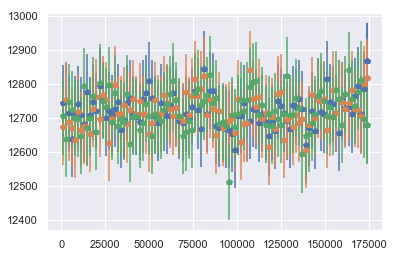

In [67]:
plt.errorbar(ts, tsm.e0[0][0], np.sqrt(tsm.e0[0][0]), fmt="p")
plt.errorbar(ts, tsm.e0[0][1], np.sqrt(tsm.e0[0][1]), fmt="p")
plt.errorbar(ts, tsm.e0[0][2], np.sqrt(tsm.e0[0][2]), fmt="p")

In [68]:
am = amap_from_tsmap(tsm, 
                     ts = 0, 
                     range_e     = e_range,
                     range_chi2  = c2_range,
                     range_lt    = lt_range)

In [69]:
avam = amap_average(am) 
avam

ASectorMap(chi2=0.9354332457953962, e0=12688.987855599418, lt=-95225.60408158568, e0u=25.5221181114445, ltu=304404.7650340209)

In [72]:
rmap = regularize_maps(am, erange=e_range, ltrange=lt_range)

2018-10-12 14:07:02,971 | INFO :  set nans to average value of interval = 9500.0
2018-10-12 14:07:02,978 | INFO :  set nans to average value of interval = 3500.0


In [73]:
asm = relative_errors(rmap)

In [74]:
am.lt

,0,1,2,3,4
0,-50567.023751,-83926.138833,-50430.102961,-1.448172e+06,-91206.272066
1,-32108.232096,-60772.666757,-195877.627256,2.264740e+05,-119693.953127
2,-34981.537360,-35221.815679,-46947.826038,-5.555725e+04,-59481.841645
3,-62096.847150,-49963.736622,-35793.971919,-4.807748e+04,-29397.789975
4,-41212.979834,-70419.447424,-54383.017925,-5.819158e+04,-25472.855023
5,-54053.578243,-50521.196457,-61089.507664,-4.498393e+04,-32639.640091


In [75]:
asm0 = amap_replace_nan_by_mean(asm, amMean=avam)

In [76]:
amap_average(asm0) 

ASectorMap(chi2=0.9354332457953962, e0=12688.987855599418, lt=-95225.60408158567, e0u=0.20115339343817884, ltu=304404.7650340209)

In [77]:
asm0.e0

,0,1,2,3,4
0,12743.237464,12734.078636,12681.826162,12733.810144,12696.110573
1,12673.509020,12680.045573,12702.525172,12706.599723,12679.248274
2,12703.668387,12699.887601,12676.072991,12681.900777,12658.407567
3,12687.751662,12676.384620,12666.951593,12708.224602,12666.855508
4,12672.714443,12684.490421,12677.176396,12718.393443,12585.986609
5,12709.239444,12692.773982,12721.043202,12698.593165,12652.128515


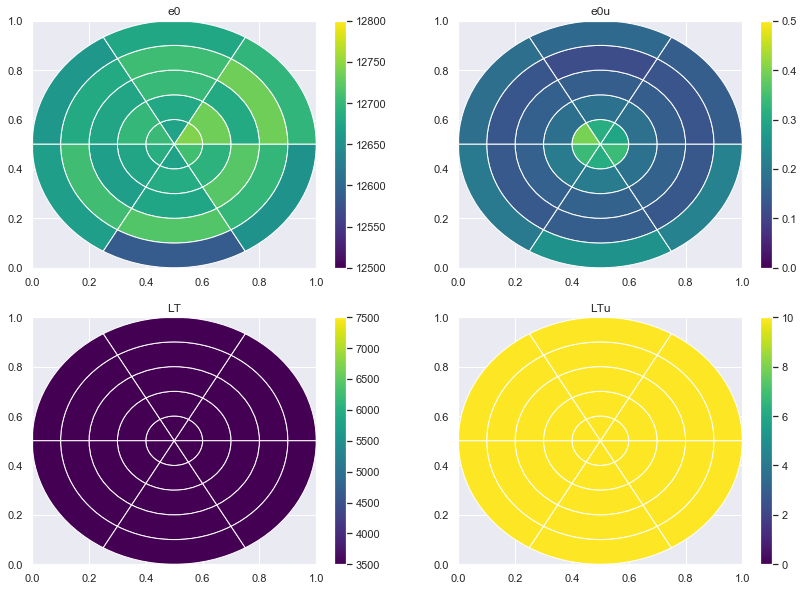

In [78]:
draw_rphi_maps(W, asm0,  
          e0lims  = (12500, 12800),
          ltlims  = (3500, 7500),
          eulims  = (0, 0.5),
          lulims  = (0,10),
          rmax=RMAX, 
          scale=0.5,
          alpha   = 1.0,  
          figsize=(14,10))

In [79]:
am = amap_from_tsmap(tsm, 
                     ts = 90, 
                     range_e     = e_range,
                     range_chi2  = c2_range,
                     range_lt    = lt_range)
amv = amap_average(am) 
#rmap = regularize_maps(am, erange=e_range, ltrange=lt_range, debug=True)
#asm = relative_errors(rmap)
asm = amap_replace_nan_by_mean(asm, amMean=amv)
amap_average(asm) 

ASectorMap(chi2=0.9354332457953962, e0=12688.987855599418, lt=-50690.42267644976, e0u=0.20115339343817884, ltu=210543.51586829787)

In [80]:
asm0.e0

,0,1,2,3,4
0,12743.237464,12734.078636,12681.826162,12733.810144,12696.110573
1,12673.509020,12680.045573,12702.525172,12706.599723,12679.248274
2,12703.668387,12699.887601,12676.072991,12681.900777,12658.407567
3,12687.751662,12676.384620,12666.951593,12708.224602,12666.855508
4,12672.714443,12684.490421,12677.176396,12718.393443,12585.986609
5,12709.239444,12692.773982,12721.043202,12698.593165,12652.128515


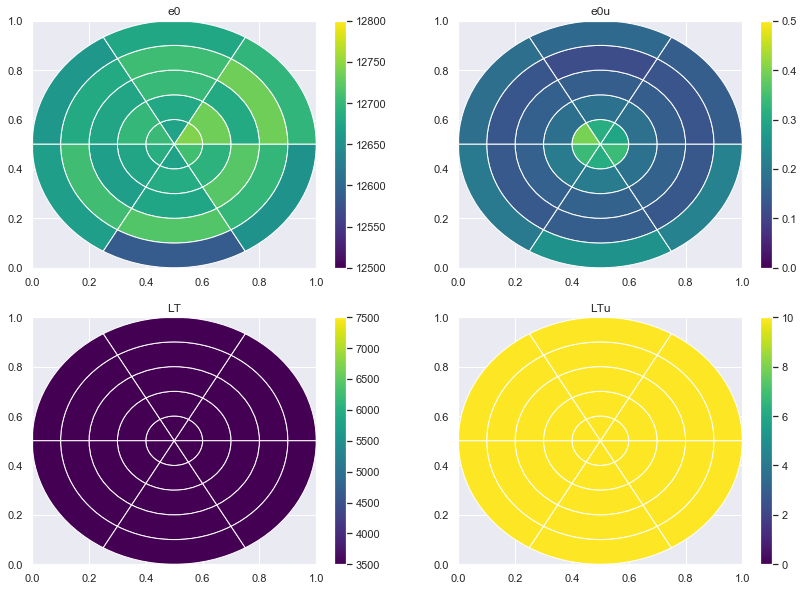

In [81]:
draw_rphi_maps(W, asm0,  
          e0lims  = (12500, 12800),
          ltlims  = (3500, 7500),
          eulims  = (0, 0.5),
          lulims  = (0,10),
          rmax=RMAX, 
          scale=0.5,
          alpha   = 1.0,  
          figsize=(14,10))

### Extract the maps for the full ts series

In [82]:
aMaps = []
E0 =[]
TT = []
t0 = time.time()
for i, tt in enumerate(ts):
    am = amap_from_tsmap(tsm, 
                         ts = i, 
                         range_e     = (12500, 13000),
                         range_chi2  = (0,100),
                         range_lt    = (4000,5000))
    amv = amap_average(am) 
    asm = relative_errors(am)
    av = amap_replace_nan_by_mean(asm, amMean=amv)
    av0 = amap_average(av) 
    #print(f'map number {i}, time = {time}')
    #print(f'map average = {av0}')
    aMaps.append(av)
    E0.append(av0.e0)
    TT.append(tt)
t1 = time.time()
print(f' fmap: t = {t1 -t0}')

 fmap: t = 0.5187921524047852


#### Plot the average value of E0 as a function of time

<ErrorbarContainer object of 3 artists>

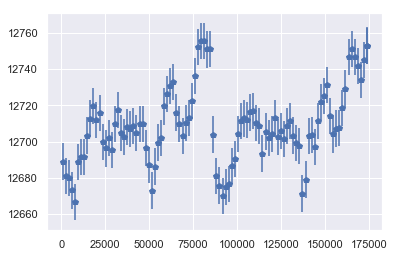

In [83]:
plt.errorbar(TT, E0, 10, fmt="p")

### Write maps

In [185]:
fn.map_file_name_ts

'/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_maps_rphi_ts_6350_6353.h5'

In [186]:
write_maps_ts(aMaps, ts, filename=fn.map_file_name_ts)

### Read maps back (notice that tts is a pd.Series)

In [84]:
tts, tsMaps = read_maps_ts(fn.map_file_name_ts)

## Attempt to correct

### The "uncorrected" distribution (corrected to first order)

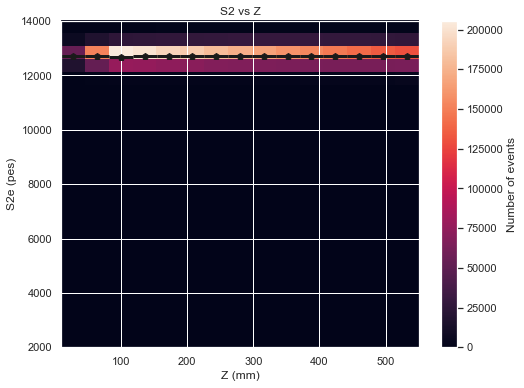

In [187]:
nevt = h2d(dst.Z, dst.S2e, krNbins.Z, krNbins.S2e, krRanges.Z, krRanges.S2e, 
           pltLabels=PlotLabels(x='Z (mm)', y='S2e (pes)', title='S2 vs Z'),
           profile=True,
           figsize=(8,6))

#### Make a kdst to attempt correction

In [85]:
kdst = kr_event(dst, DT, dst.S2e, dst.S2q)
fr = RMAX / NSECTORS 

In [86]:
log.setLevel(logging.INFO)

In [89]:
t0 = time.time()
kge =  e0_rphi_correction_ts(kdst, tts, tsMaps, fr, SPHI)     
t1 = time.time()
print(f' E0 correction: t = {t1 -t0}')

 E0 correction: t = 18.934834003448486


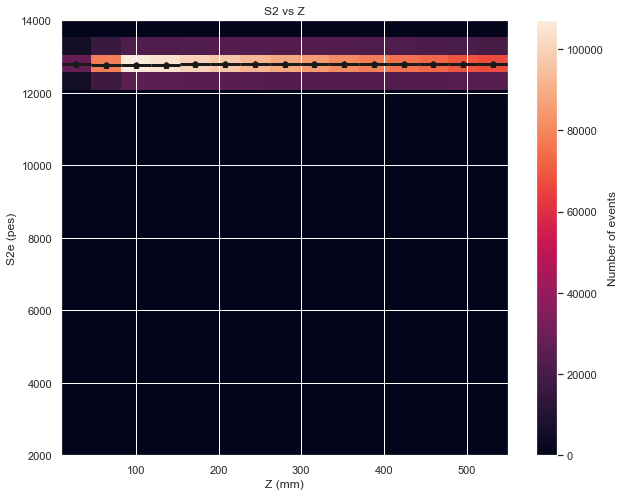

In [90]:
nevt = h2d(kge.Z, kge.E, krNbins.Z, krNbins.S2e, krRanges.Z, krRanges.S2e, 
           pltLabels=PlotLabels(x='Z (mm)', y='S2e (pes)', title='S2 vs Z'),
           profile=True,
           figsize=(10,8))

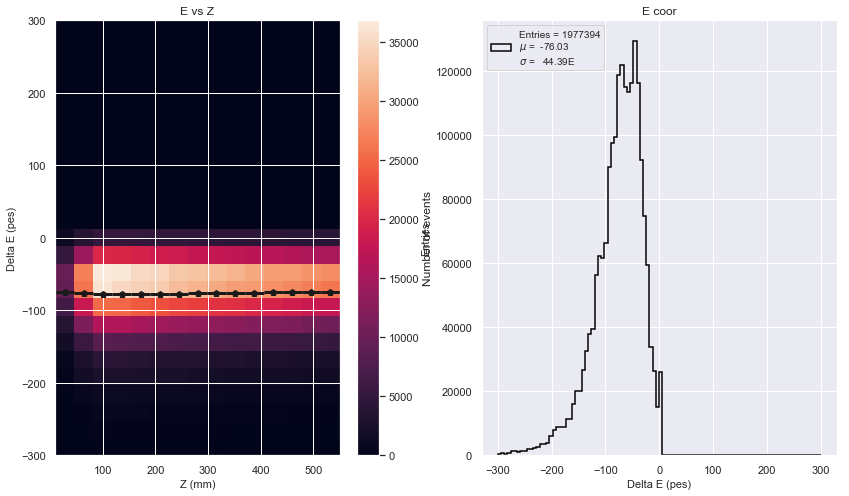

In [95]:
e_range = (-300, 300)
fig = plt.figure(figsize=(14,8))
ax  = fig.add_subplot(1, 2, 1)

nevt = h2(kge.Z, kge.S2e - kge.E, krNbins.Z, krNbins.S2e, krRanges.Z, e_range, profile=True)
plot_histo(PlotLabels(x='Z (mm)', y='Delta E (pes)', title='E vs Z'), ax, legend=False)

ax      = fig.add_subplot(1, 2, 2)
(_)     = h1(kge.S2e - kge.E,  bins = 100, range =e_range, stats=True, lbl = 'E')
plot_histo(PlotLabels('Delta E (pes)','Entries','E coor'), ax, legendloc='upper left')

#### "Correction" shifts the energy values (this may be an effect of normalizations).

### "Uncorrected" distribution

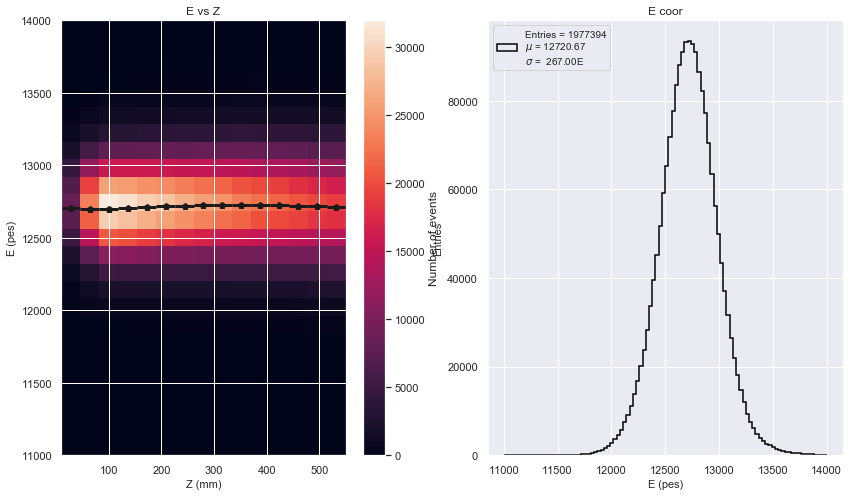

In [96]:
e_range = (11000, 14000)
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(1, 2, 1)

nevt = h2(kge.Z, kge.S2e, krNbins.Z, krNbins.S2e, krRanges.Z, e_range, profile=True)
plot_histo(PlotLabels(x='Z (mm)', y='E (pes)', title='E vs Z'), ax, legend=False)

ax      = fig.add_subplot(1, 2, 2)
(_)     = h1(kge.S2e,  bins = 100, range =e_range, stats=True, lbl = 'E')
plot_histo(PlotLabels('E (pes)','Entries','E coor'), ax, legendloc='upper left')

#### "Corrected" distribution

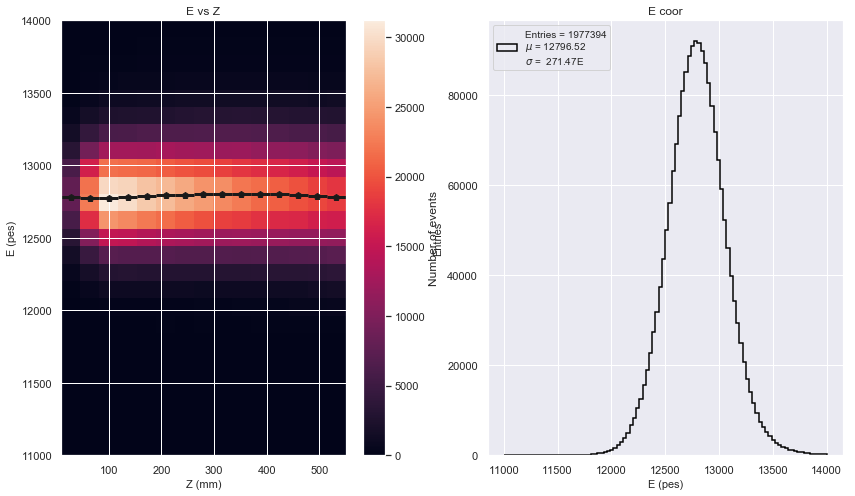

In [97]:
e_range = (11000, 14000)
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(1, 2, 1)

nevt = h2(kge.Z, kge.E, krNbins.Z, krNbins.S2e, krRanges.Z, e_range, profile=True)
plot_histo(PlotLabels(x='Z (mm)', y='E (pes)', title='E vs Z'), ax, legend=False)

ax      = fig.add_subplot(1, 2, 2)
(_)     = h1(kge.E,  bins = 100, range =e_range, stats=True, lbl = 'E')
plot_histo(PlotLabels('E (pes)','Entries','E coor'), ax, legendloc='upper left')

#### No improvement. 